In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

data = pd.read_csv('churn_analysis.csv')

In [2]:
data = data.drop(['Unnamed: 0'], axis=1) #ненужный столбец

In [3]:
data.head()

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,...,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,1,0.65,False.
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,0.55,False.
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,0.72,False.
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,1,0.28,False.
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,2,0.45,False.


In [31]:
# 1 

treatment_1 = data[data['treatment'] == 1]

In [117]:
states = list(set(data['state']))

In [134]:
p_values = []
k = 0
for i in range(len(states)):
    for j in range(len(states)):
        if i != j and i < j:
            contigency = pd.crosstab(treatment_1.churn, treatment_1[(treatment_1['state'] == states[i]) | 
                                                                    (treatment_1['state'] == states[j])].state)
            #print(contigency)
            a = contigency[states[i]][0]
            b = contigency[states[j]][0]
            c = contigency[states[i]][1]
            d = contigency[states[j]][1]
            mcc = (a*d - b*c)/ math.sqrt((a+b)*(a+c)*(b+d)*(c+d)) #коэффициент корреляции Мэтьюса
            p_values.append(stats.chi2_contingency(contigency)[1])
            

In [137]:
p = 0
[p for i in p_values if float(i) < 0.05]

[]

Значений p-value муньше 0.05 нет.

Для этой задачи подходит коэффициент корреляции Мэтьюса, так как у нас бинарные значения. И к нему критерий хи-квадрат.

In [14]:
# 2

stats.pearsonr(data['day_calls'], data['mes_estim'])

(-0.051794350587572625, 0.0027798836869756707)

In [15]:
stats.spearmanr(data['day_calls'], data['mes_estim'])

SpearmanrResult(correlation=0.043349880533927444, pvalue=0.012317367189170541)

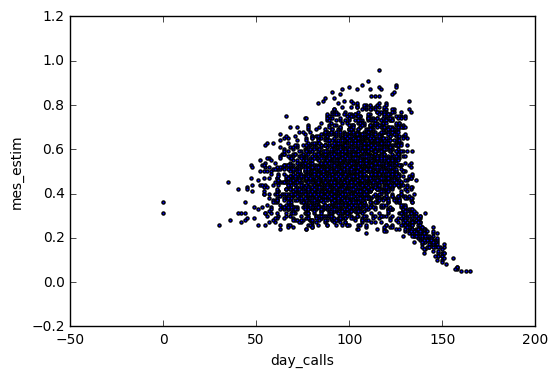

In [7]:
plt.scatter(x=data['day_calls'], y=data['mes_estim'], s=5)
plt.xlabel('day_calls')
plt.ylabel('mes_estim')

Коэффициенты корреляции Пирсона и Спримена меняются от -1 до 1. +-1 говорит, что у х и у идеальная взаимосвязь. 
0, что никакой корреляции нет. Как видим по коэффициентам корреляция Пирсона и Спирмена, признаки плохо связаны и линейно и монотонно.
Почему разные знаки? На картинке видим, что данные расположены не линейно и не монотонно. Выглядит так, 
будто из облака начали вытягивать часть точек в нижний правый угол. Корреляция Пирсона не устойчива к выбросам и даже пара 
точек может изменить знак коэффициента, если их расположить на достаточно большом расстоянии от основной выборки,
Поэтому в коэффициенте Пирсона появился знак минус.
Коэффициент Спирмена устойчив к выбросам и поэтому знак остался положительным.
По p-value видим, что его значения далеки от 0.05, значит, значимость низкая.

In [158]:
# 3   (http://stackoverflow.com/questions/20892799/using-pandas-calculate-cram%C3%A9rs-coefficient-matrix)

def cramers_stat(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))


In [159]:
confusion_matrix = pd.crosstab(treatment_1.state, treatment_1.churn)

result = cramers_stat(confusion_matrix)

In [160]:
result

0.20039321502033319

Значение коэффициента Крамера = 0.2, что показывает, что признаки не очень связаны.

In [164]:
stats.chi2_contingency(confusion_matrix)[:3]

(44.052712366925483, 0.70975900427784411, 50)

хи-квадрат = 44.05, p-value = 0.709
Нельзя утверждать, что связь между признаками есть.

In [139]:
# 4

treatment_0_1 = data[data.treatment != 2]
churn_0_1 = pd.crosstab(treatment_0_1.churn, treatment_0_1.treatment)

treatment_1_2 = data[data.treatment != 0]
churn_1_2 = pd.crosstab(treatment_1_2.churn, treatment_1_2.treatment)

In [141]:
churn_0_1

treatment,0,1
churn,,
False.,968,917
True.,165,180


In [142]:
churn_1_2

treatment,1,2
churn,,
False.,917,965
True.,180,138


In [143]:
stats.chi2_contingency(churn_0_1)

(1.3135522978703889,
 0.25175249831939228,
 1,
 array([[ 957.71524664,  927.28475336],
        [ 175.28475336,  169.71524664]]))

In [144]:
stats.chi2_contingency(churn_1_2)

(6.4435991416199307,
 0.011135281386020091,
 1,
 array([[ 938.43363636,  943.56636364],
        [ 158.56636364,  159.43363636]]))

Методы отличаются. Метод 2 лучше, так как мы отрицаем гипотезу, что метод 2 не эффективен. О методе 0 мы можем сказать только, что нельзя утверждать, что метод 0 эффективен.
Посоветовала бы методом 2.